In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [229]:
df=pd.read_csv(r"C:\Users\Ashish\Desktop\Datasets\winequality-red.csv")

In [230]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [231]:
df.shape

(1599, 12)

In given Data set we have 1599 Rows and 12 Columns Including O/P Column.

In [232]:
#check the null values are available or not in data set
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There is no Null Values in dataset

In [233]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [234]:
#Duplicate Removal
df.drop_duplicates(inplace=True)
df.shape

(1359, 12)

In [235]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [236]:
#Observation after Removal of Duplicate values

After removing  240 Duplicate entries we have 1359 Rows and 12 Columns available for further analysis.

In [237]:
df.skew()

fixed acidity           0.941041
volatile acidity        0.729279
citric acid             0.312726
residual sugar          4.548153
chlorides               5.502487
free sulfur dioxide     1.226579
total sulfur dioxide    1.540368
density                 0.044778
pH                      0.232032
sulphates               2.406505
alcohol                 0.859841
quality                 0.192407
dtype: float64

In [238]:
#Observation
#1 - No Missing values
#2 - Outliers in chlorides,residual sugar,sulphates,free sulfur dioxide,total sulfur dioxide .

In [239]:
df.skew()

fixed acidity           0.941041
volatile acidity        0.729279
citric acid             0.312726
residual sugar          4.548153
chlorides               5.502487
free sulfur dioxide     1.226579
total sulfur dioxide    1.540368
density                 0.044778
pH                      0.232032
sulphates               2.406505
alcohol                 0.859841
quality                 0.192407
dtype: float64

## Vusualize the data distribution and analyze the skewness or outliers

In [240]:
#we no need to visualize the lable's so seperating only features into new dataframe
df_feature = df.drop('quality',axis = 1)

In [241]:
df_feature.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0


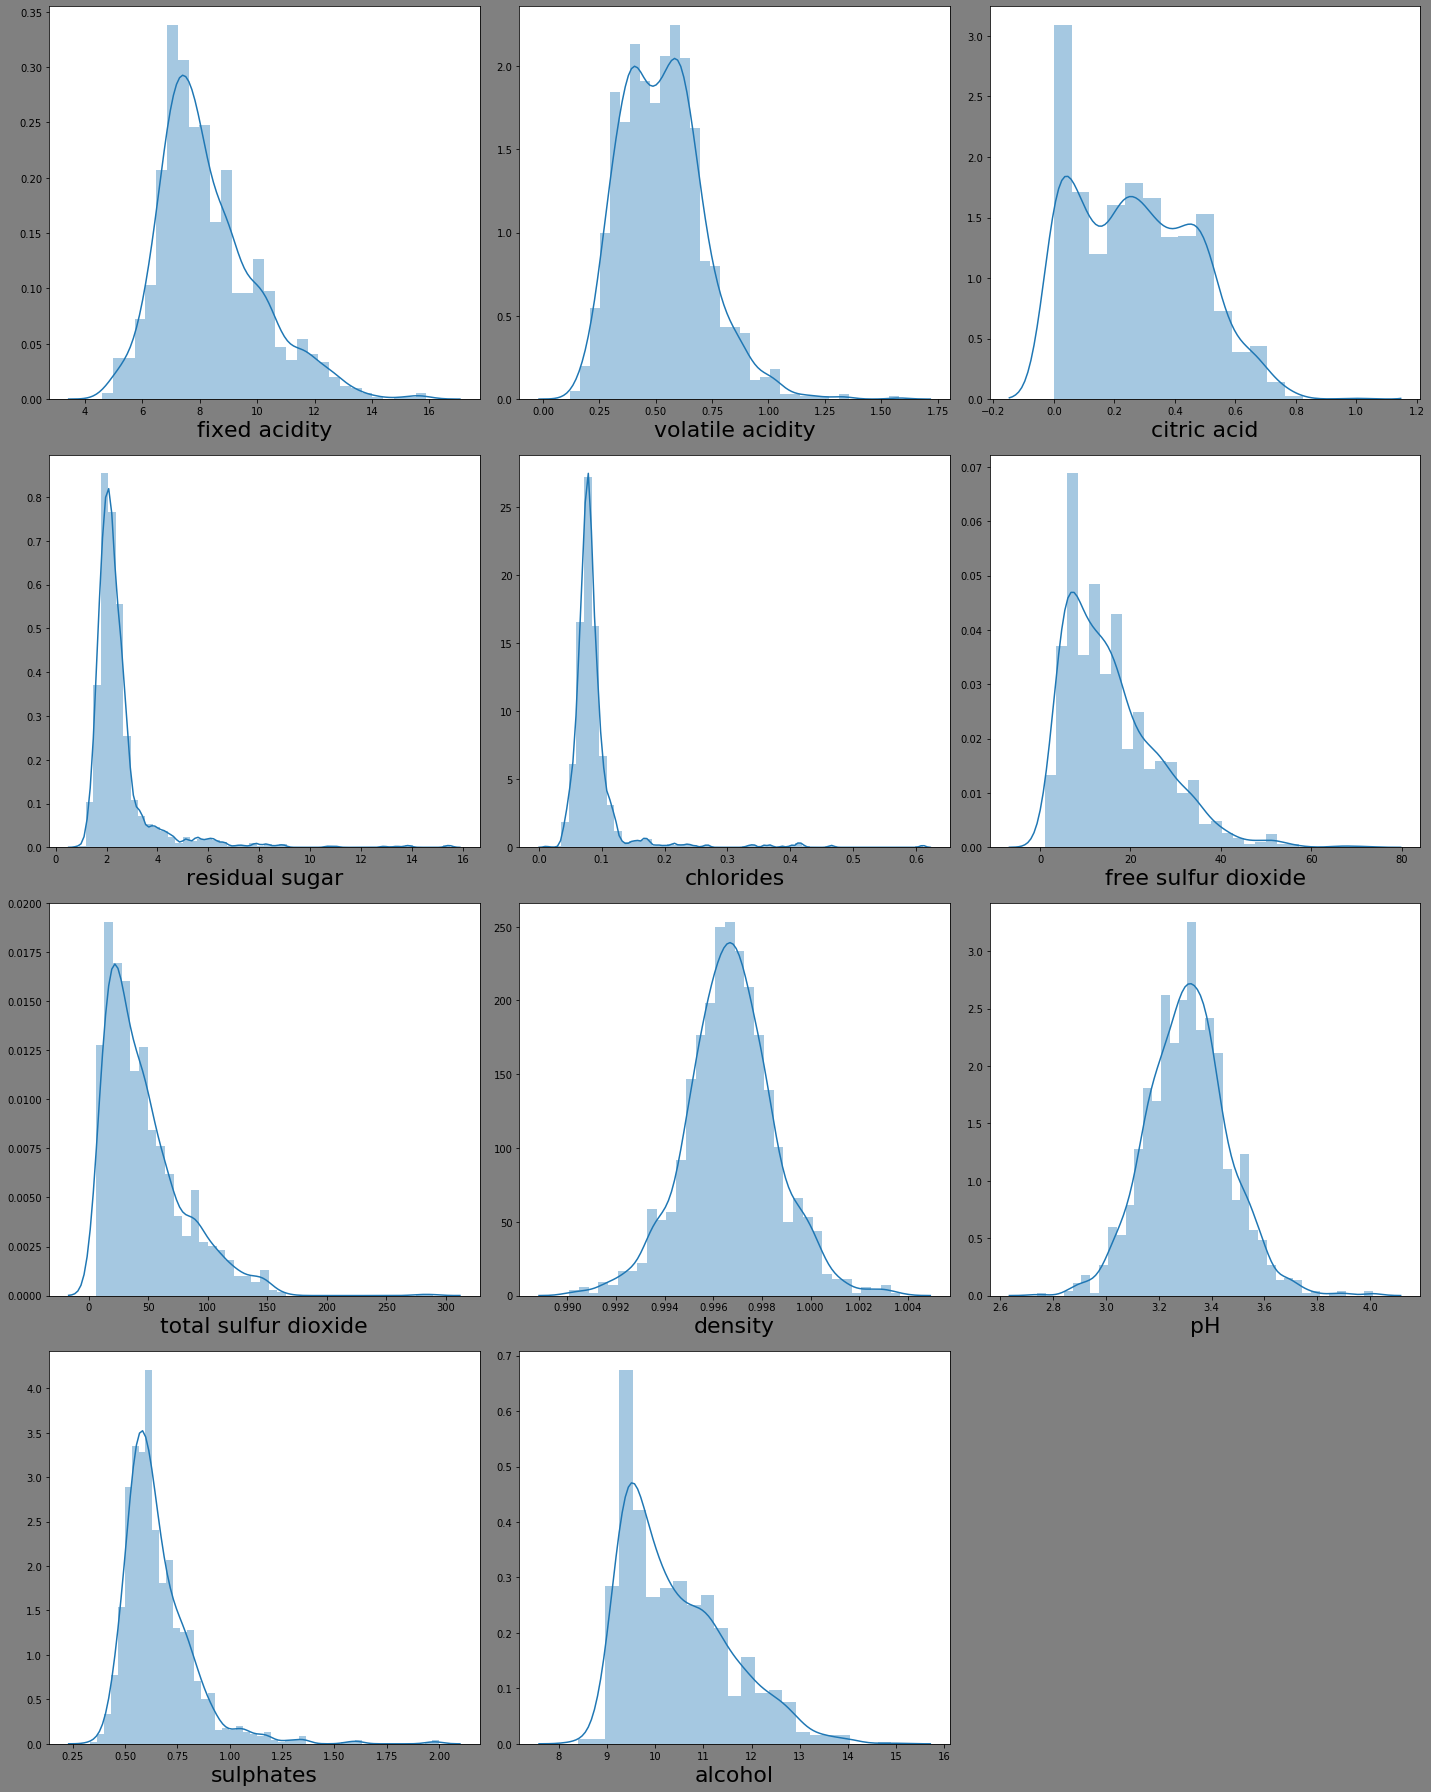

In [242]:
#let see how data is distribute in every column

plt.figure(figsize=(20,25),facecolor="grey")
plotnumber=1

for column in df_feature:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df_feature[column])
        plt.xlabel(column,fontsize=22)
    plotnumber+=1
plt.tight_layout()

In [243]:
# We need to remove skewnes from 

alcohol ,
sulphates,
total sulfur dioxide,
free sulfur dioxide,
chlorides,               
residual sugar,          
fixed acidity

### Detecting Outliers with the help of boxplot and IQR

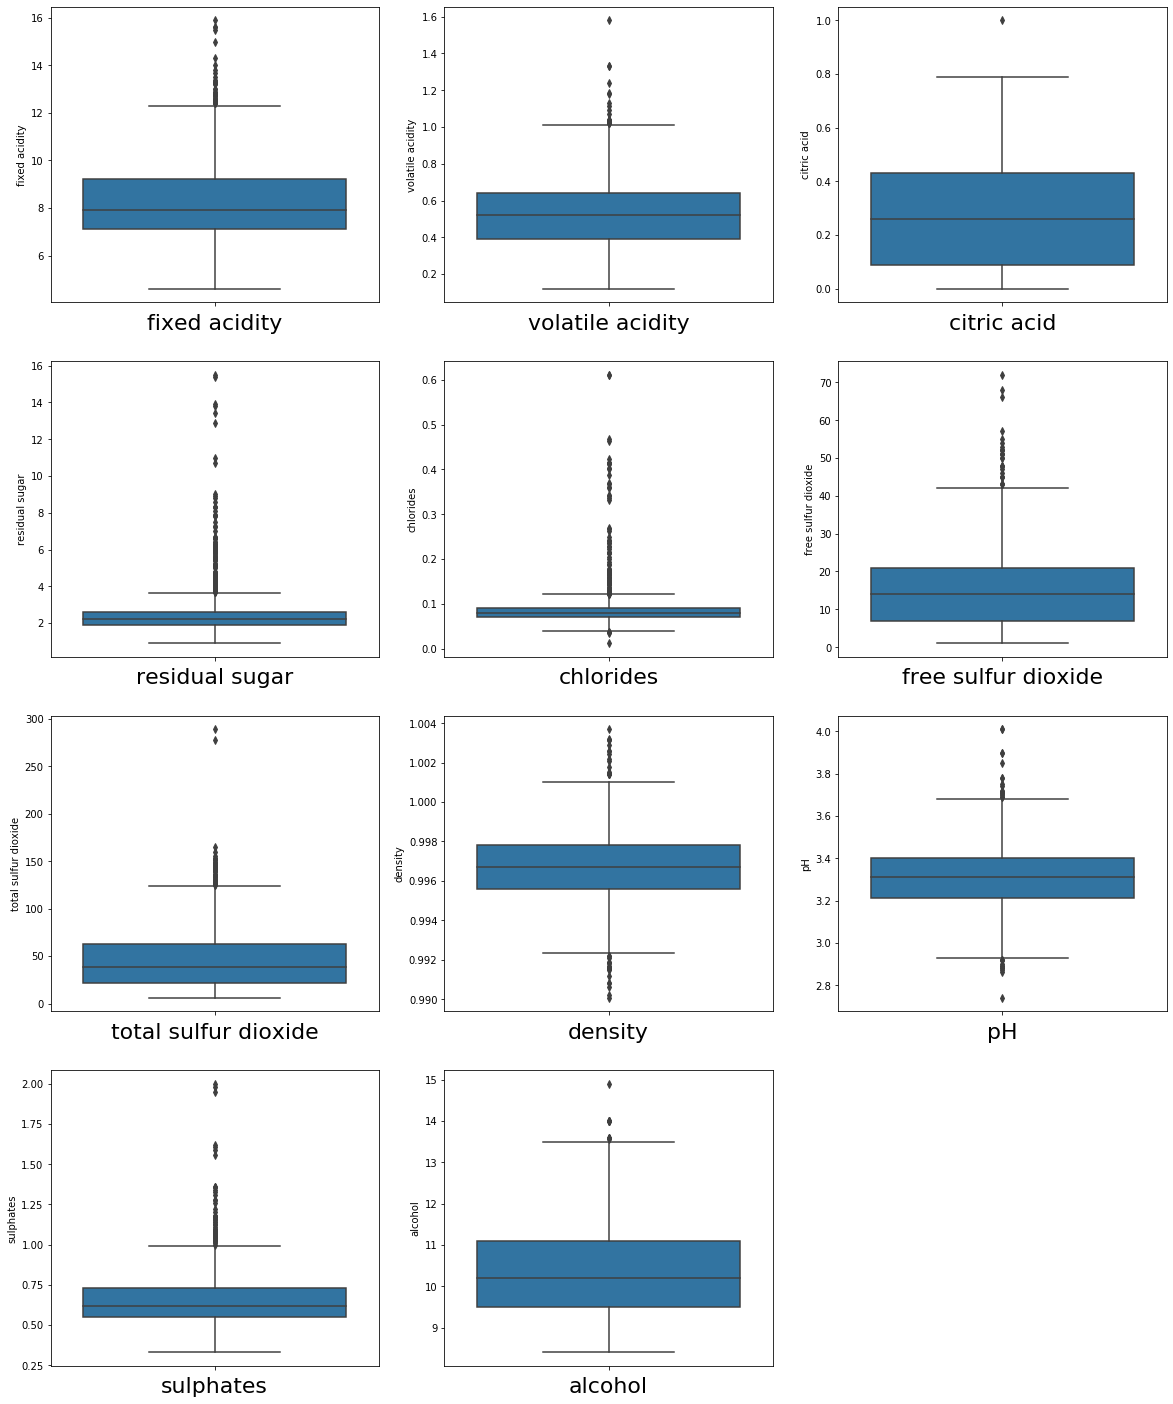

In [244]:
plt.figure(figsize=(20,25))
graph=1

for column in df_feature:
    if graph<=12:
        ax=plt.subplot(4,3,graph)
        sns.boxplot(df_feature[column],orient = 'v')
        plt.xlabel(column,fontsize=22)
    graph+=1
plt.show()

##### Observation

In [245]:
#As per above Graph  PH,Density,Chlorides have Both side outliers rest of all others Features have Upper Side Outliers 

### Remove outlier by using Z_ Score  

In [246]:
from scipy.stats import zscore
z=np.abs(zscore(df_feature))
threshold = 3
df_new = df_feature[(z<3).all(axis = 1)]

In [247]:
print("shape Before and after")
print("shape before".ljust(20),":",df_feature.shape)
print("shape after".ljust(20),":",df_new.shape)
print("Precentage of data loss".ljust(20),":",(df_feature.shape[0]-df_new.shape[0]/df_feature.shape[0]))

shape Before and after
shape before         : (1359, 11)
shape after          : (1239, 11)
Precentage of data loss : 1358.0883002207506


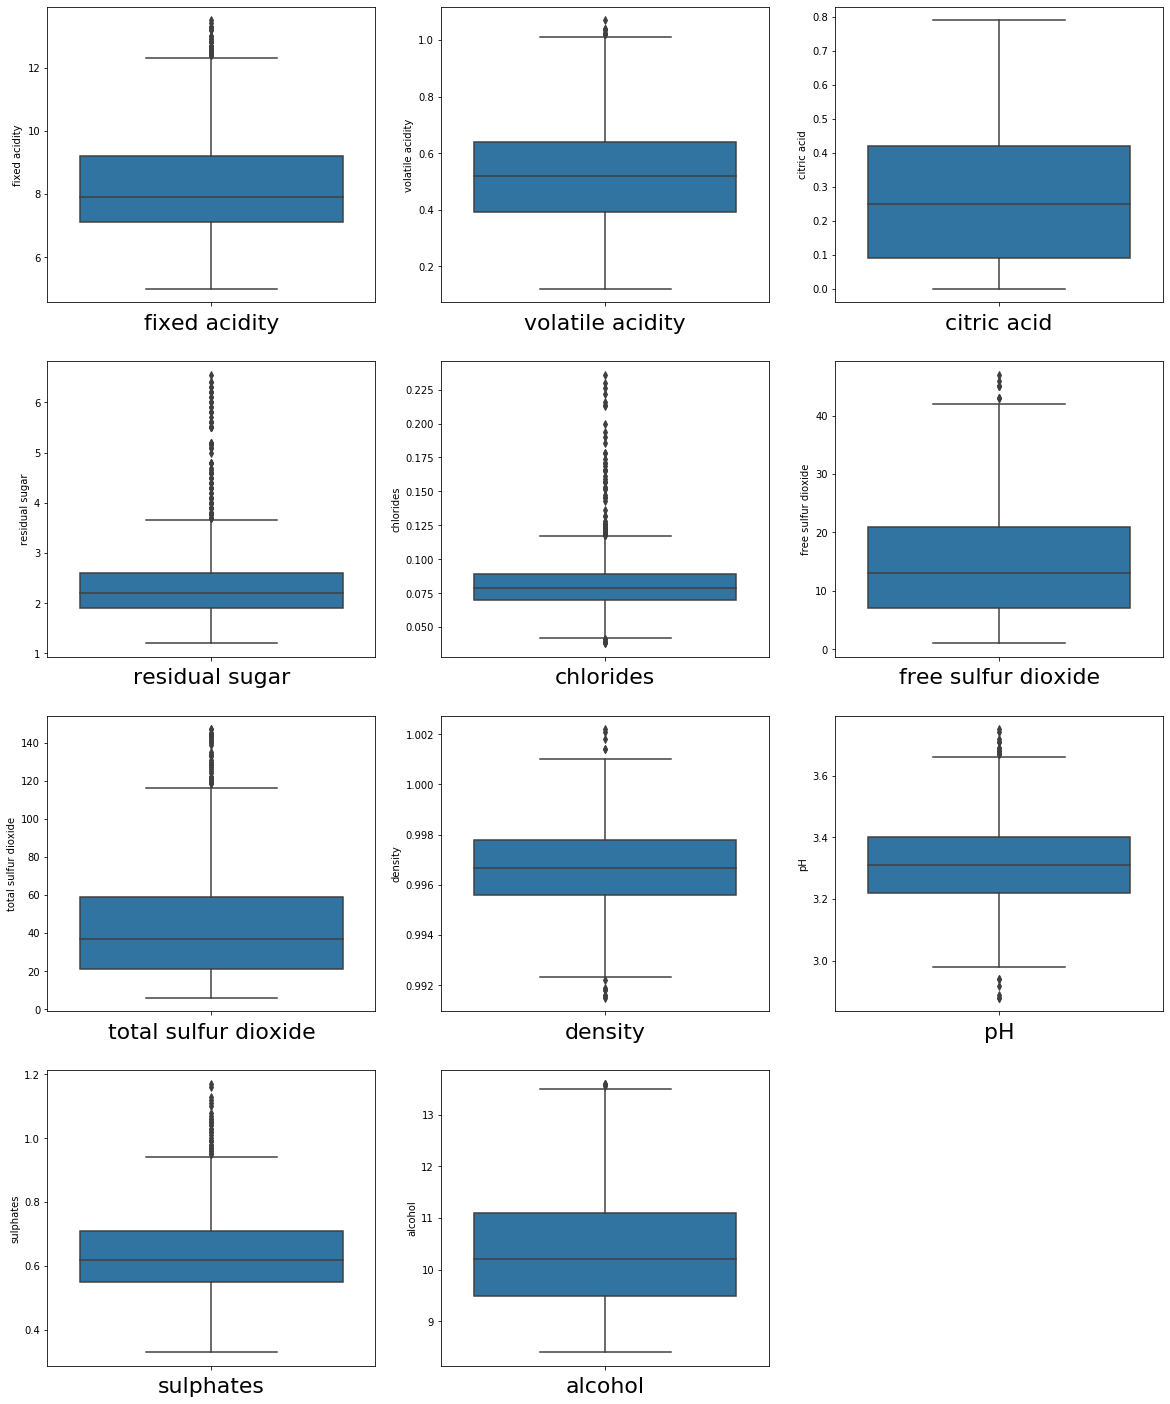

In [248]:
#graph after removing of outliers
plt.figure(figsize=(20,25))
graph=1

for column in df_new:
    if graph<=12:
        ax=plt.subplot(4,3,graph)
        sns.boxplot(df_new[column],orient = 'v')
        plt.xlabel(column,fontsize=22)
    graph+=1
plt.show()

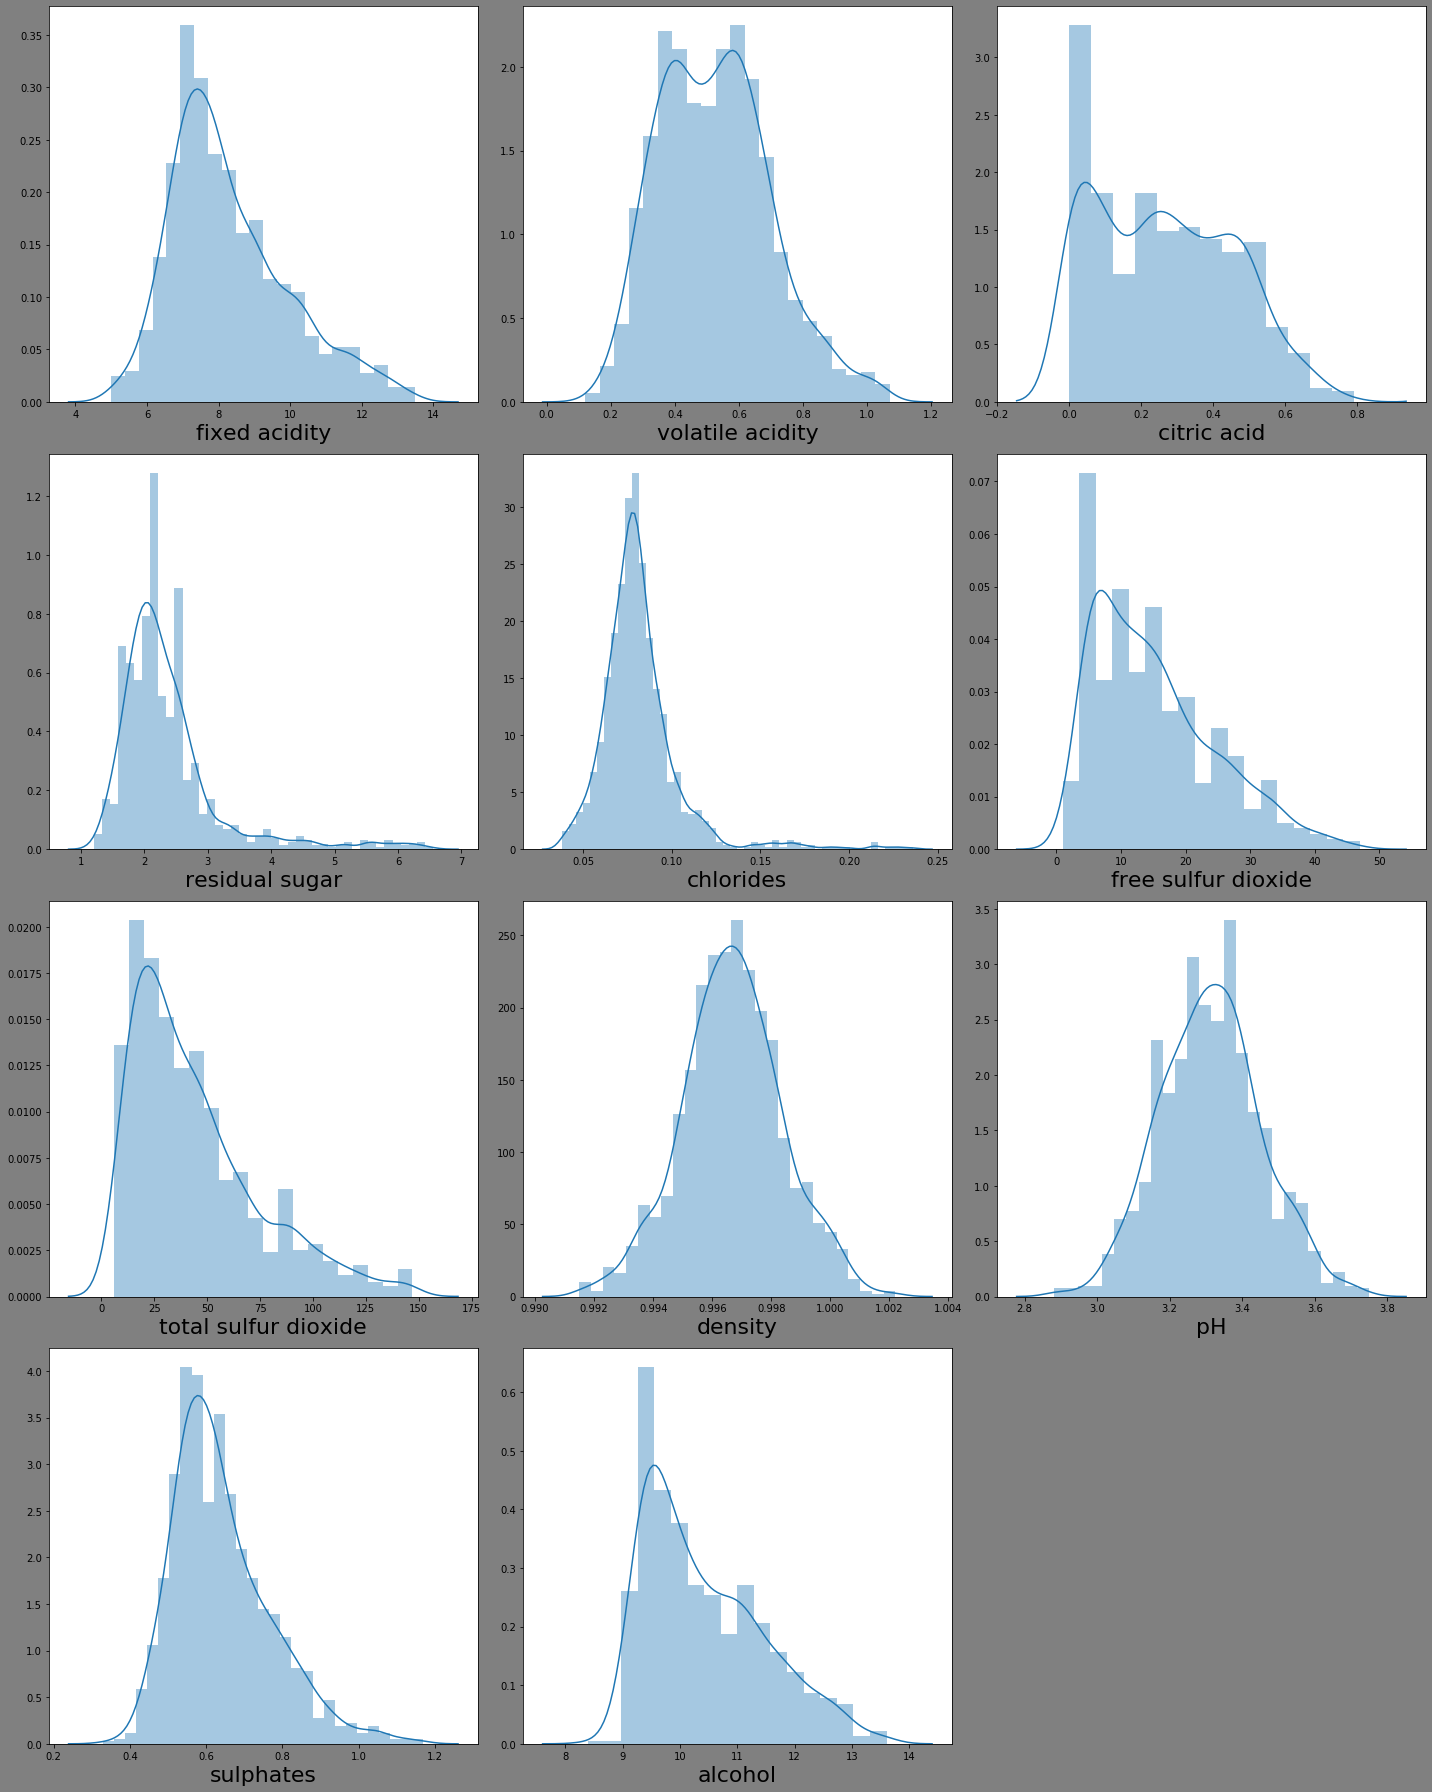

In [249]:
#let see how data is distribute in every column

plt.figure(figsize=(20,25),facecolor="grey")
plotnumber=1

for column in df_new:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column,fontsize=22)
    plotnumber+=1
plt.tight_layout()

##### OBSERVATION:-
    
Removing the features outlier by using the Z_SCORE method we had lost much more data .but even if we observ that by using the 
distplot method we can see some of our features are still not normally distributed.

### Remove Outliers By Using IQR Method

In [250]:
#We'll find the IQR to identify outlier

#1st quantile
q1 = df_feature.quantile(0.25)

#3rd quantile
q3 = df_feature.quantile(0.75)

#IQR
iqr = q3 - q1

#As we have Outlier Detection formula

higher side = Q3 + (1.5 * IQR)
lower side = Q1 - (1.5 * IQR)

In [251]:
#Removing Outlier Using IQR Method
df_new = df_feature[~((df_feature < (q1 - 1.5 * iqr)) |(df_feature > (q3 + 1.5 * iqr))).any(axis=1)]

In [252]:
print("shape Before and after")
print("shape before".ljust(20),":",df_feature.shape)
print("shape after".ljust(20),":",df_new.shape)
print("Precentage of data loss".ljust(20),":",(df_feature.shape[0]-df_new.shape[0]/df_feature.shape[0]))

shape Before and after
shape before         : (1359, 11)
shape after          : (1019, 11)
Precentage of data loss : 1358.2501839587933


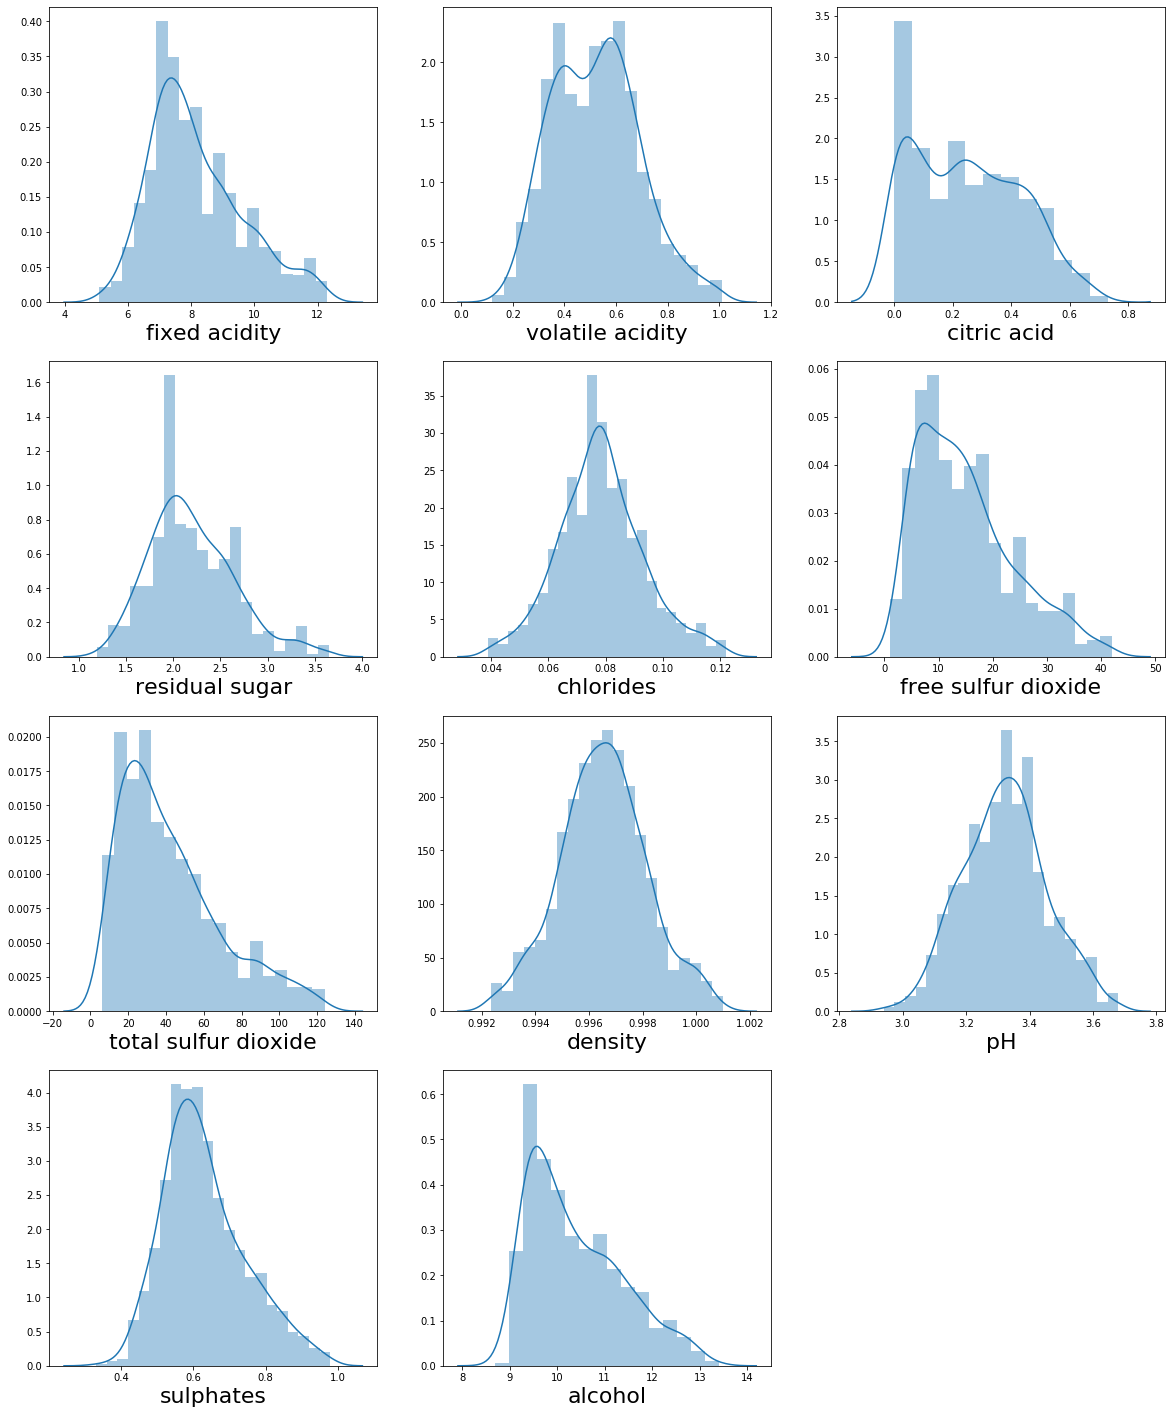

In [253]:
#graph after removing of outliers
plt.figure(figsize=(20,25))
graph=1

for column in df_new:
    if graph<=12:
        ax=plt.subplot(4,3,graph)
        sns.distplot(df_new[column])
        plt.xlabel(column,fontsize=22)
    graph+=1
plt.show()

In [254]:
df_new.skew()

fixed acidity           0.701409
volatile acidity        0.317337
citric acid             0.297948
residual sugar          0.607954
chlorides               0.229168
free sulfur dioxide     0.843417
total sulfur dioxide    0.981776
density                 0.058430
pH                      0.089297
sulphates               0.622553
alcohol                 0.755782
dtype: float64

##### OBSERVATION:-
    
Removing the features outlier by using the IQR method we had lost much more data .but even if we observ that by using the 
distplot method we can see some of our features are still not normal distributed.

### Now We'll try to remove the outlers by using QUANTILE METHOD

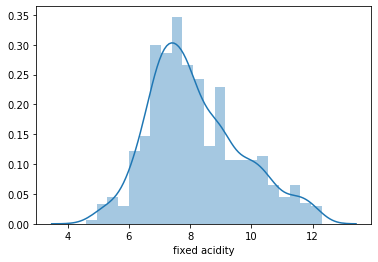

In [255]:
#removing top 3 % data from 'fixed acidity'
q = df_feature['fixed acidity'].quantile(0.97)
data_cleaned = df_feature[df_feature['fixed acidity']<q]

sns.distplot(data_cleaned['fixed acidity'])

In [256]:
# Right Skewness of 'fixed acidity' column has been almost removed.....If we process more but we may loss important data.

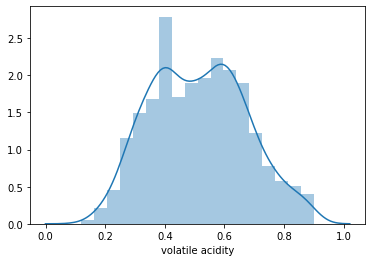

In [257]:
#removing top 3 % data from 'fixed acidity'
q = df_feature['volatile acidity'].quantile(0.97)
data_cleaned = df_feature[df_feature['volatile acidity']<q]

sns.distplot(data_cleaned['volatile acidity'])

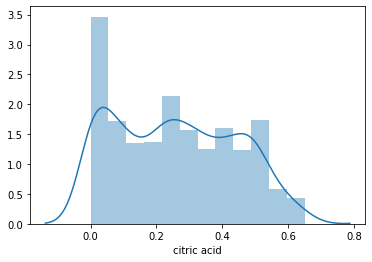

In [258]:
#removing top 3 % data from 'citric acid'
q = df_feature['citric acid'].quantile(0.97)
data_cleaned = df_feature[df_feature['citric acid']<q]

sns.distplot(data_cleaned['citric acid'])

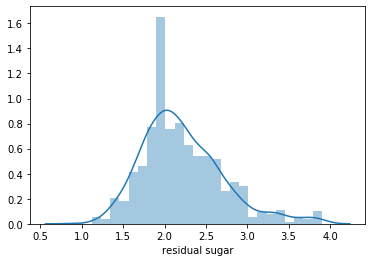

In [259]:
#removing top 3 % data from 'citric acid'
q = df_feature['residual sugar'].quantile(0.92)
data_cleaned1 = df_feature[df_feature['residual sugar']<q]

sns.distplot(data_cleaned1['residual sugar'])

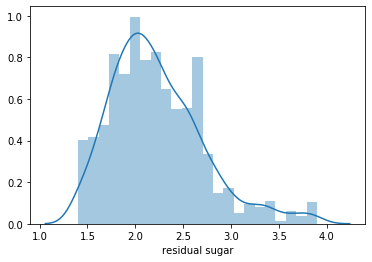

In [260]:
#removing bottom 1 % data from 'citric acid'
q = data_cleaned1['residual sugar'].quantile(0.01)
data_cleaned = data_cleaned1[data_cleaned1['residual sugar']>q]

sns.distplot(data_cleaned['residual sugar'])

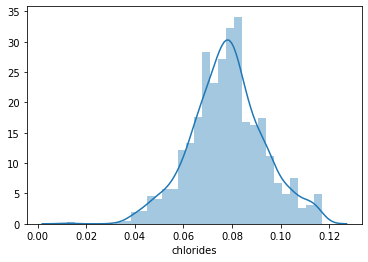

In [261]:
#removing top 7 % data from 'chlorides'
q = df_feature['chlorides'].quantile(0.93)
data_cleaned1 = df_feature[df_feature['chlorides']<q]

sns.distplot(data_cleaned1['chlorides'])

We can observ that when we remove the top data then right outlier is removed but the left outlier is increased .NOw we have to remove left skewness

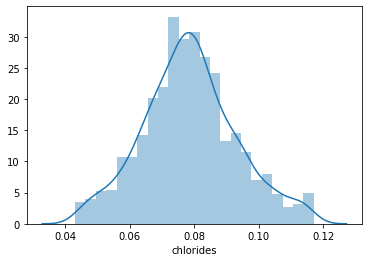

In [262]:
#removing bottom 1 % data from 'chlorides'
q = data_cleaned1['chlorides'].quantile(0.01)
data_cleaned = data_cleaned1[data_cleaned1['chlorides']>q]

sns.distplot(data_cleaned['chlorides'])

Now we got proper data there is no more left as well as right skewness

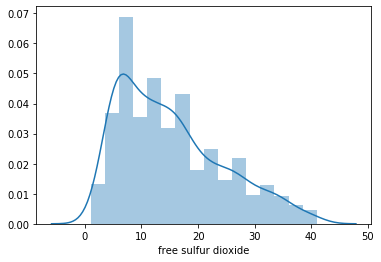

In [263]:
#removing top 2 % data from 'free sulfur dioxide'
q = df_feature['free sulfur dioxide'].quantile(0.98)
data_cleaned = df_feature[df_feature['free sulfur dioxide']<q]

sns.distplot(data_cleaned['free sulfur dioxide'])

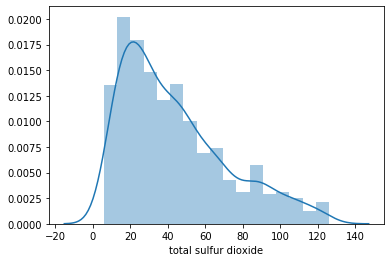

In [264]:
#removing top 3 % data from 'total sulfur dioxide'
q = df_feature['total sulfur dioxide'].quantile(0.97)
data_cleaned1 = df_feature[df_feature['total sulfur dioxide']<q]

sns.distplot(data_cleaned1['total sulfur dioxide'])

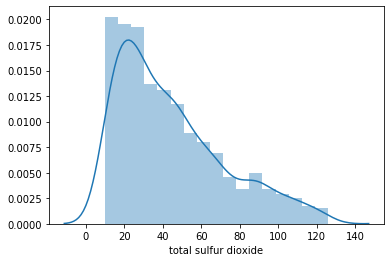

In [265]:
#removing bottom 2 % data from 'total sulfur dioxide'
q = data_cleaned1['total sulfur dioxide'].quantile(0.02)
data_cleaned = data_cleaned1[data_cleaned1['total sulfur dioxide']>q]

sns.distplot(data_cleaned['total sulfur dioxide'])

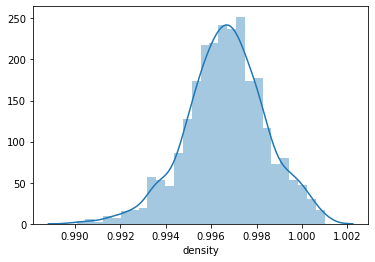

In [266]:
#removing top 3 % data from 'density'
q = df_feature['density'].quantile(0.99)
data_cleaned1 = df_feature[df_feature['density']<q]

sns.distplot(data_cleaned1['density'])

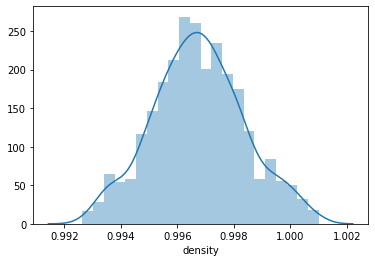

In [267]:
#removing bottom 2 % data from 'density'
q = data_cleaned1['density'].quantile(0.02)
data_cleaned = data_cleaned1[data_cleaned1['density']>q]

sns.distplot(data_cleaned['density'])

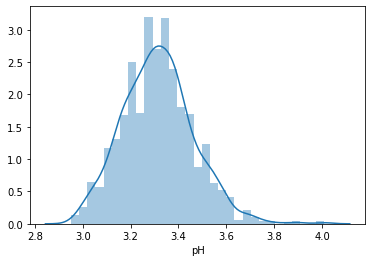

In [268]:
#removing bottom 1 % data from 'pH'
q = df_feature['pH'].quantile(0.01)
data_cleaned1 = df_feature[df_feature['pH']>q]

sns.distplot(data_cleaned1['pH'])

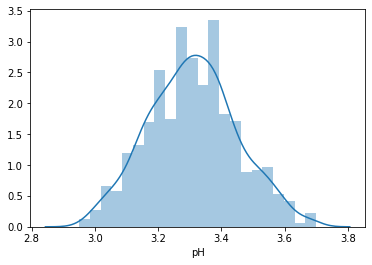

In [269]:
#removing top 1 % data from 'pH'
q = data_cleaned1['pH'].quantile(0.99)
data_cleaned = data_cleaned1[data_cleaned1['pH']<q]

sns.distplot(data_cleaned['pH'])

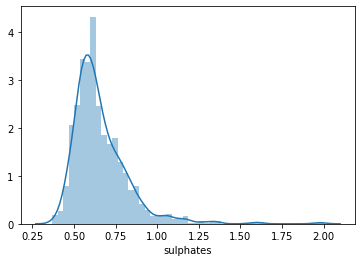

In [270]:
#removing bottom 0.01 % data from 'sulphates'
q = df_feature['sulphates'].quantile(0.0001)
data_cleaned1 = df_feature[df_feature['sulphates']>q]

sns.distplot(data_cleaned1['sulphates'])

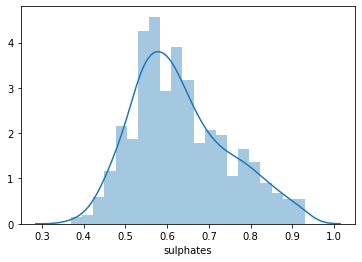

In [271]:
#removing top 6 % data from 'sulphates'
q = data_cleaned1['sulphates'].quantile(0.95)
data_cleaned = data_cleaned1[data_cleaned1['sulphates']<q]

sns.distplot(data_cleaned['sulphates'])

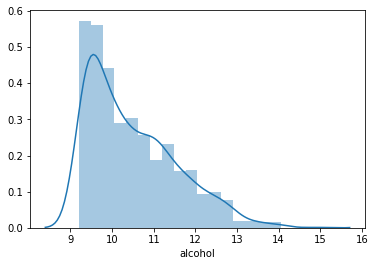

In [272]:
#removing bottom 3 % data from 'sulphates'
q = df_feature['alcohol'].quantile(0.03)
data_cleaned1 = df_feature[df_feature['alcohol']>q]

sns.distplot(data_cleaned1['alcohol'])

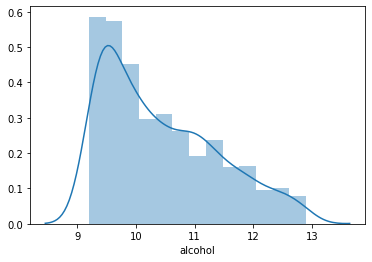

In [273]:
#removing top 2 % data from 'sulphates'
q = data_cleaned1['alcohol'].quantile(0.98)
data_cleaned = data_cleaned1[data_cleaned1['alcohol']<q]

sns.distplot(data_cleaned['alcohol'])

In [274]:
data_cleaned.skew()

fixed acidity           0.933074
volatile acidity        0.712290
citric acid             0.299839
residual sugar          4.314773
chlorides               5.901050
free sulfur dioxide     1.217661
total sulfur dioxide    1.596065
density                 0.164221
pH                      0.198900
sulphates               2.470002
alcohol                 0.689609
dtype: float64

In [276]:
df_feature.skew()

fixed acidity           0.941041
volatile acidity        0.729279
citric acid             0.312726
residual sugar          4.548153
chlorides               5.502487
free sulfur dioxide     1.226579
total sulfur dioxide    1.540368
density                 0.044778
pH                      0.232032
sulphates               2.406505
alcohol                 0.859841
dtype: float64

In [277]:
from scipy import stats
df_feature.skew()

fixed acidity           0.941041
volatile acidity        0.729279
citric acid             0.312726
residual sugar          4.548153
chlorides               5.502487
free sulfur dioxide     1.226579
total sulfur dioxide    1.540368
density                 0.044778
pH                      0.232032
sulphates               2.406505
alcohol                 0.859841
dtype: float64

In [280]:
SE=stats.boxcox(df_feature['chlorides'])[0]
u=pd.Series(SE)

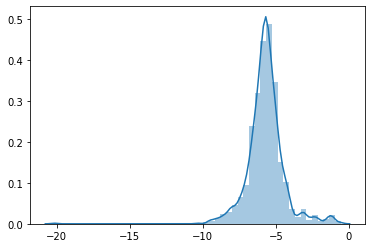

In [283]:
sns.distplot(pd.Series(SE))

In [285]:
T=np.log(df_feature['chlorides'])
T.skew()

1.8876423282330907